In [1]:
import sys
import os
# Add the directory containing 'thesis_utils.py' to the system path
sys.path.append(os.path.abspath('..'))  # If 'thesis_utils.py' is one level up
# Or use this if it's in the same directory as the notebook:
# sys.path.append(os.getcwd())
# os.environ["JULIA_NUM_THREADS"] = "8" 
os.environ["PYTHON_JULIACALL_HANDLE_SIGNALS"] = "yes"
os.environ["PYTHON_JULIACALL_THREADS"] = "auto"
os.environ["PYTHON_JULIACALL_OPTLEVEL"] = "3"
from pysr import PySRRegressor
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

from thesis_utils import *

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [57]:
import importlib
import thesis_utils  # or whatever your module is called

importlib.reload(thesis_utils)

from thesis_utils import *

In [2]:
data = pd.read_csv("data/customer_churn.csv")
data = data.dropna()
# sub sampling due to degrading performance with too large datasets in denoising and SR
# data_sample = data.sample(n=9600, random_state=42)

In [3]:
# Generate the profiling report
profile_full = ProfileReport(data, title="Customer", explorative=True)

# Display the report in the notebook
profile_full.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:00<00:00, 6893.67it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# variable assignment according to correlation structure
independents_lst = ['Distinct Called Numbers', 'Frequency of SMS', 'Frequency of use', 'Seconds of Use']
dependent_var = 'Customer Value'
X = data[independents_lst].to_numpy()
y = data[dependent_var].to_numpy()

In [5]:
sr_model = PySRRegressor(
        niterations=1024,  # Number of iterations to search for equations
        binary_operators=["+", "-", "*", "/"],
        unary_operators=["log", "abs", "sqrt"],
        maxdepth=10,
        elementwise_loss="loss(x, y) = (x - y)^2",  # Define loss function (mean squared error)
        verbosity=0,
        maxsize=50
    )
sr_model.fit(X, y)

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                           470.9729   
	1         0.777553                                      x1 * 4.909752   
	2         0.100531                                sqrt(x1) * 77.36741   
	3         0.966932                             (x1 + x2) / 0.28266796   
	4         0.109758                        (x1 + sqrt(x3)) * 3.8199947   
	5   >>>>  0.466454              (x1 + (x3 * 0.009556492)) * 4.0916743   
	6         0.001239  ((x1 + -1.9662695) + (x3 * 0.009713897)) * 4.1...   
	7         0.001962  (x3 * 0.03955025) + abs((x1 + -2.1742897) * 4....   
	8         0.065150  ((x2 * 0.00409793) - -3.8811326) * ((x3 * 0.00...   
	9         0.002912  (((x2 * 0.004678627) - -3.8217764) * (x1 + (x3...   
	10        0.010959  ((((x1 / 3.8421419) - x2) * -0.0042654974) - -...   
	11        0.001881  (((x0 + ((x1 / 4.754845) - x2)) * -0.005520977...   
	12        0.018056  (((x1 - x2) * -0.0024145173) - -4.988553) * ((...   
	13        0.008655  ((x1 + (x3 * 0.008155892)) * ((x2 * 0.00529298...   
	14        0.028081  ((x3 * 0.0065503735) + abs((x0 / -3.6706357) +...   
	15        0.003689  ((((x1 / 3.3929455) - x2) * -0.0059779817) - -...   
	16        0.017467  (sqrt(x1) * 15.896513) + ((((x2 - x0) * 0.0115...   
	17        0.004363  ((((x2 - x0) * 0.012043839) - -2.8686757) * ((...   
	18        0.009808  abs((sqrt(x1) + -1.0995969) * 54.00066) + ((ab...   
	19        0.002126  (x1 + (abs((x2 + ((x1 * x1) * 0.0023015155)) -...   
	20        0.000888  ((abs(x1 + -49.21897) + ((x3 * 0.012218983) + ...   
	21        0.032603  x1 + ((abs((x1 / 0.3287834) - ((x1 * (x1 * 0.0...   
	22        0.020648  (((x3 * x3) * 1.2780486e-8) * x1) + ((abs(((x2...   
	23        0.009217  ((x1 - (x1 * (x3 * (x3 * -1.1822085e-8)))) + (...   
	24        0.002726  abs((((x1 * x1) * 0.0023336767) - ((x1 + -2.56...   
	25        0.009321  ((((x1 - x0) * (x3 * (x3 * 1.4040542e-8))) - (...   
	26        0.011573  abs(((x2 * ((x2 * 0.009959247) - 0.5224076)) +...   
	27        0.038553  (abs(((x1 * (x1 * 0.0018934725)) - ((x1 + (x1 ...   
	28        0.000610  ((x1 - ((x3 * -0.020126067) - x2)) + (((x1 - x...   
	29        0.003995  ((x1 - ((x3 * -0.020119552) - x2)) + abs((((x1...   
	30        0.000395  ((x3 * (x0 - x1)) * (x3 * -1.37645335e-8)) + (...   
	31        0.002064  (abs((x1 * (x1 * 0.001661368)) + ((x2 * abs(0....   
	32        0.000279  (abs(((x1 * x1) * 0.0016613733) + (abs(x2 * (0...   
	
	           loss  complexity  
	0   267220.0600           1  
	1    56428.0620           3  
	2    51031.1050           4  
	3    19404.4670           5  
	4    17387.3980           6  
	5    10905.7630           7  
	6    10878.7750           9  
	7    10857.4490          10  
	8    10172.6380          11  
	9    10113.5650          13  
	10    9894.3120          15  
	11    9857.1550          17  
	12    9680.7670          18  
	13    9597.3380          19  
	14    9331.5820          20  
	15    9262.9910          22  
	16    9102.6030          23  
	17    9023.5140          25  
	18    8848.2280          27  
	19    8829.4410          28  
	20    8821.6060          29  
	21    8538.6290          30  
	22    8193.2040          32  
	23    8043.5557          34  
	24    7999.8270          36  
	25    7852.0723          38  
	26    7672.4140          40  
	27    7382.2500          41  
	28    7373.2540          43  
	29    7343.8570          44  
	30    7338.0615          46  
	31    7307.8380          48  
	32    7303.7627          50  
]

In [5]:
# 20250430_183414_zs5E73
# Complexity 17
candidate_function = generate_candidate_function("(((x0 + ((x1 / 4.754845) - x2)) * -0.005520977) - -4.360754) * ((x3 * 0.007077078) + x1)")
# candidate_function = generate_candidate_function("0.5136726*x2 + 1.2973638799338*sqrt(x4) + 0.5136726*sqrt(Abs(x1)) + 0.5136726*Abs(x3 + log(x5)*sin(2.48172932259734*sin(log(x5) - 0.88440996)))")

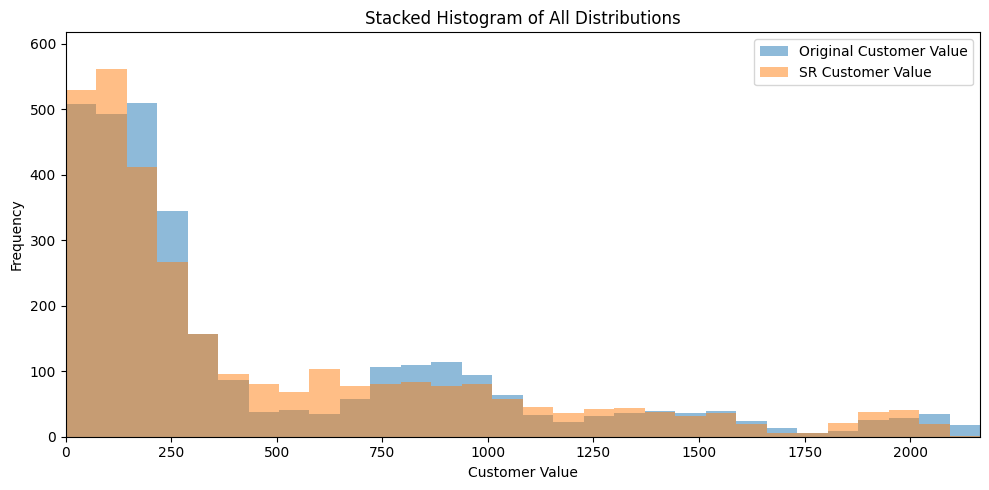

In [8]:
%matplotlib inline
# X_aux = X[:, [0, 2]]
# y_denoised = candidate_function(X_aux)
y_sr = candidate_function(X)
plot_histograms([(y, 'Original Customer Value', None), (y_sr, 'SR Customer Value', None)], 'Customer Value', stack=True, figsize_per_plot=(10, 5))

<Figure size 640x480 with 0 Axes>

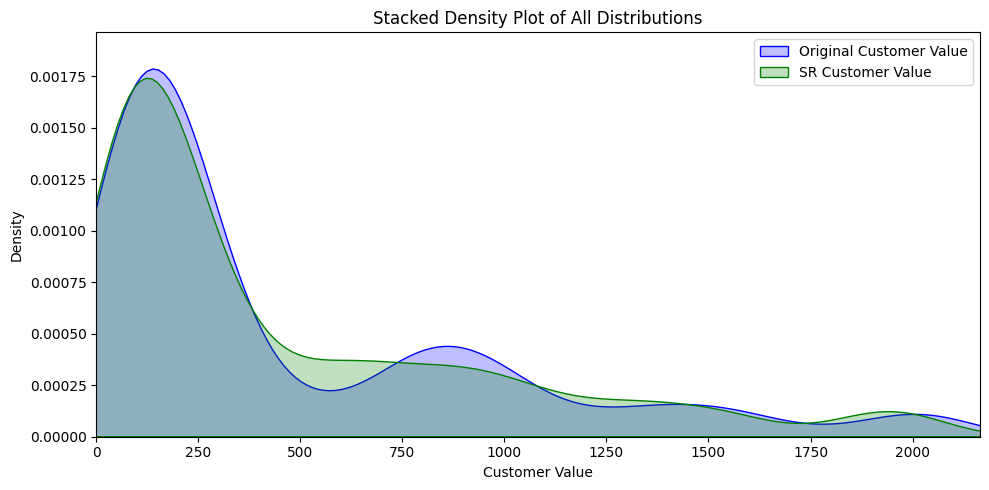

In [10]:
plot_densities([(y, 'Original Customer Value', 'blue'), (y_sr, 'SR Customer Value', 'green')], 'Customer Value', stack=True, figsize_per_plot=(10, 5))

In [11]:
orig_residuals = y - y_sr

In [ ]:
y_corrected, best_amp, errors, _ = correct_predictions(y, y_sr, method='stratified', seed=42, clip_lower=0, clip_upper=None, original_residuals=None, tail_replace=True, lower_percentile=50)
# ignore error in orig_residuals after first run

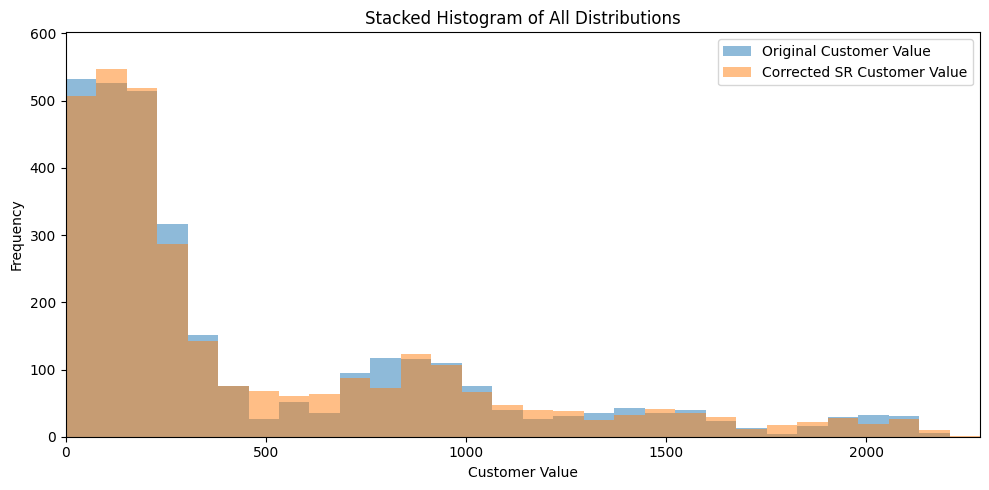

In [13]:
plot_histograms([(y, 'Original Customer Value', None), (y_corrected, 'Corrected SR Customer Value', None)], 'Customer Value', stack=True, figsize_per_plot=(10, 5))

<Figure size 640x480 with 0 Axes>

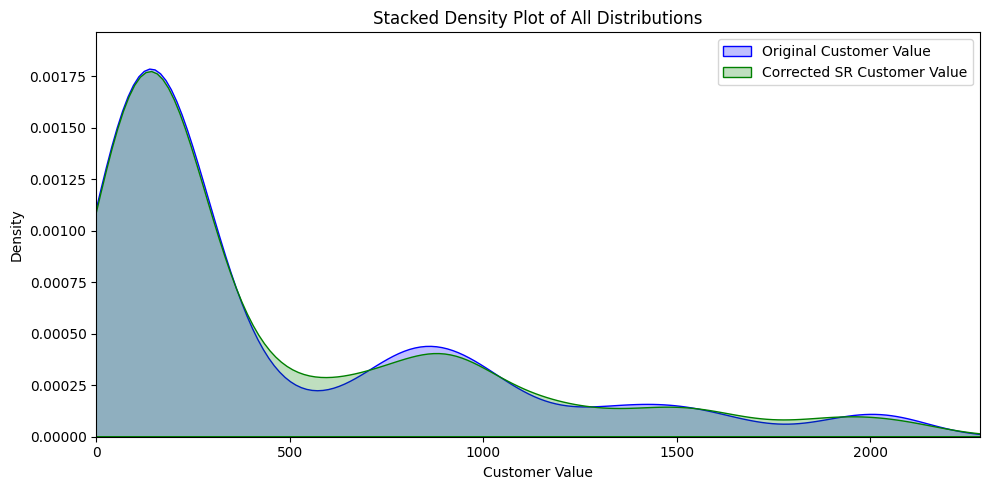

In [21]:
plot_densities([(y, 'Original Customer Value', 'blue'), (y_corrected, 'Corrected SR Customer Value', 'green')], 'Customer Value', stack=True, figsize_per_plot=(10, 5))

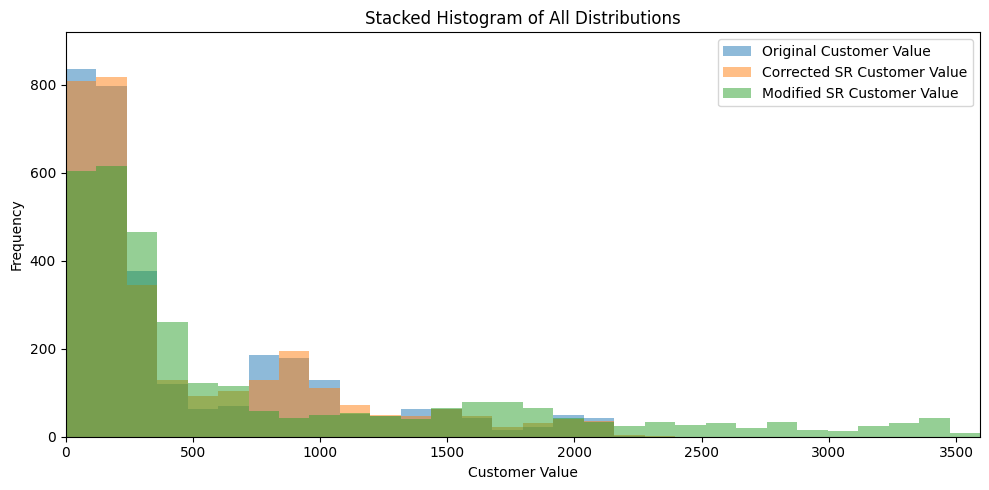

In [ ]:
mod_candidate_function = generate_candidate_function("(((x0 + ((2*x1 / 4.754845) - x2)) * -0.005520977) - -4.360754) * ((x3 * 0.007077078) + 2*x1)")
mod_y_sr = mod_candidate_function(X)
mod_y_corrected, best_amp, errors, _ = correct_predictions(y, mod_y_sr, method='stratified', amplification_factor=1.0, seed=42, clip_lower=0, clip_upper=None, original_residuals=orig_residuals, tail_replace=True, lower_percentile=50)
# ignore error in orig_residuals after first run
plot_histograms([(y, 'Original Customer Value', None), (y_corrected, 'Corrected SR Customer Value', None), (mod_y_corrected, 'Modified SR Customer Value', None)], 'Customer Value', stack=True, figsize_per_plot=(10, 5))